<div style="background-color:#004d40; color:#ffffff; padding:15px; border-radius:8px; font-size:24px; font-weight:bold; text-align:center;">
    Insurance Claim Prediction
</div>


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Overview
</div>

This data frame contains the following columns:

* age : age of policyholder
* sex: gender of policy holder (female=0, male=1)
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25

* steps: average walking steps per day of policyholder
* children: number of children / dependents of policyholder
* smoker: smoking state of policyholder (non-smoke=0;smoker=1)
* region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
* charges: individual medical costs billed by health insurance
* insuranceclaim: yes=1, no=0

- Data Source : https://www.kaggle.com/datasets/yasserh/insurance-claim-dataset


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Import Libraries
</div>

In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Load Dataset
</div>

In [62]:
# Load the dataset
df = pd.read_csv("insurance.csv")  
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


female=0, male=1

In [63]:
# --------  Check for Duplicates & Missing Values --------
print(f"Duplicate Rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
# Check if duplicates are removed
print(f"Remaining Duplicates: {df.duplicated().sum()}")
print("\nMissing Values Count:\n", df.isnull().sum())

Duplicate Rows: 1
Remaining Duplicates: 0

Missing Values Count:
 age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
    Exploratory Data Analysis
</div>

In [64]:
# Basic statistics
print("\nBasic Data Statistics:\n")
df.describe()


Basic Data Statistics:



,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487,0.584892
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656,0.492925
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300,1.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


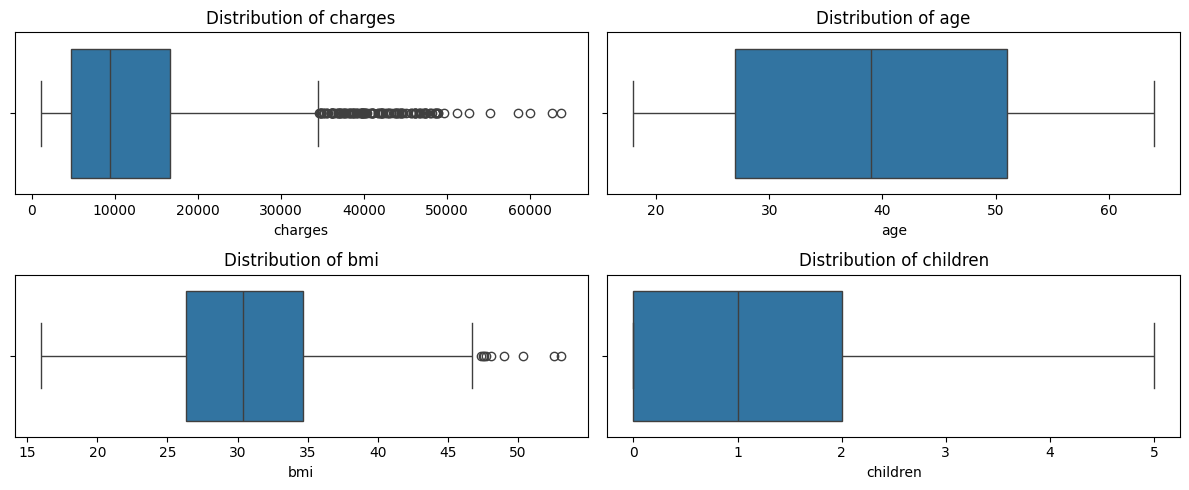

In [65]:

# Countplot for categorical variables
plt.figure(figsize=(12, 5))
for i, col in enumerate(["charges","age","bmi","children"]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

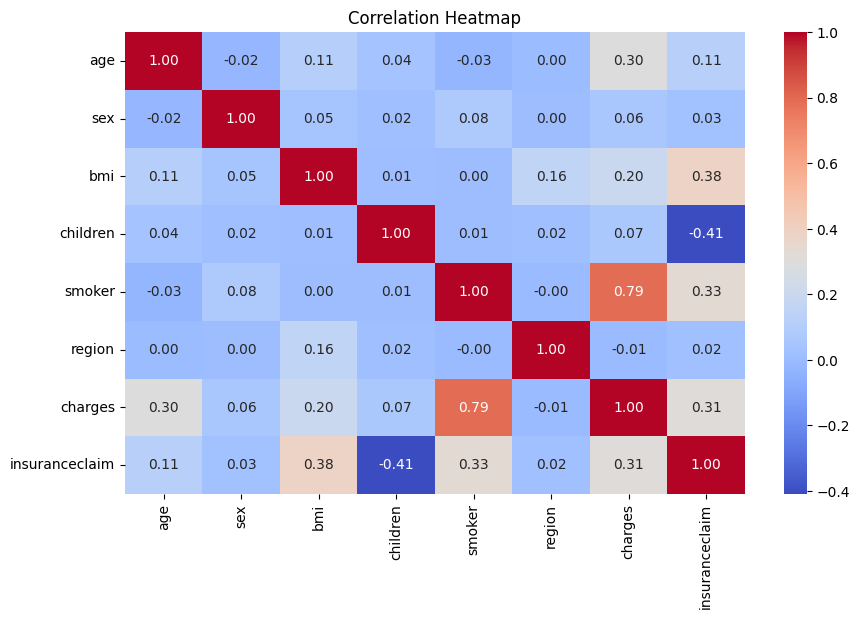

In [66]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
     Statistical Analysis 
</div>

In [67]:
# Checking correlation of numerical features with `charges`
correlations = df.corr()["charges"].sort_values(ascending=False)
print("\nFeature Correlation with Charges:\n", correlations)


Feature Correlation with Charges:
 charges           1.000000
smoker            0.787234
insuranceclaim    0.310213
age               0.298308
bmi               0.198401
children          0.067389
sex               0.058044
region           -0.006547
Name: charges, dtype: float64


In [68]:

from scipy.stats import shapiro,mannwhitneyu

# Check normality for smokers and non-smokers
smokers_charges = df[df["smoker"] == 1]["charges"]
non_smokers_charges = df[df["smoker"] == 0]["charges"]

# Shapiro-Wilk test (p > 0.05 means normal distribution)
shapiro_smokers = shapiro(smokers_charges)
shapiro_non_smokers = shapiro(non_smokers_charges)

print(f"Shapiro Test - Smokers: p-value={shapiro_smokers.pvalue}")
print(f"Shapiro Test - Non-Smokers: p-value={shapiro_non_smokers.pvalue:}")



Shapiro Test - Smokers: p-value=3.6249900590074145e-09
Shapiro Test - Non-Smokers: p-value=1.5035032808411558e-28


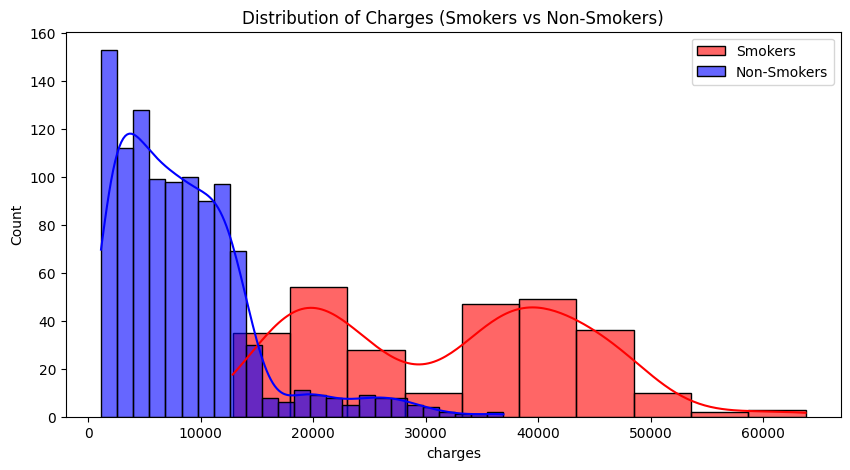

In [69]:
# Histogram to visualize
plt.figure(figsize=(10, 5))
sns.histplot(smokers_charges, kde=True, color="red", label="Smokers", alpha=0.6)
sns.histplot(non_smokers_charges, kde=True, color="blue", label="Non-Smokers", alpha=0.6)
plt.legend()
plt.title("Distribution of Charges (Smokers vs Non-Smokers)")
plt.show()


Assumption (Normality) is violated, so we cannot use a standard parametric T-test because it assumes normality.Since the data is not normally distributed, use the Mann-Whitney U test (or Wilcoxon rank-sum test) instead of the T-test. 

It compares the median charges between smokers and non-smokers.

In [70]:
# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(smokers_charges, non_smokers_charges, alternative="two-sided")

print(f"Mann-Whitney U Test Results:")
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: There is a significant difference in charges between smokers and non-smokers.")
else:
    print("Conclusion: No significant difference in charges between smokers and non-smokers.")


Mann-Whitney U Test Results:
U-statistic: 283859.0
P-value: 5.74701188239214e-130
Conclusion: There is a significant difference in charges between smokers and non-smokers.


Since the p-value is extremely small (almost zero), we reject the null hypothesis. 

This means that,
* Smokers and non-smokers do not have the same distribution of medical charges.
* Smokers tend to have significantly higher medical expenses than non-smokers.

C:\Users\beena\AppData\Local\Temp\ipykernel_37772\1759331266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["smoker"], y=df["charges"], palette="coolwarm",legend=False)


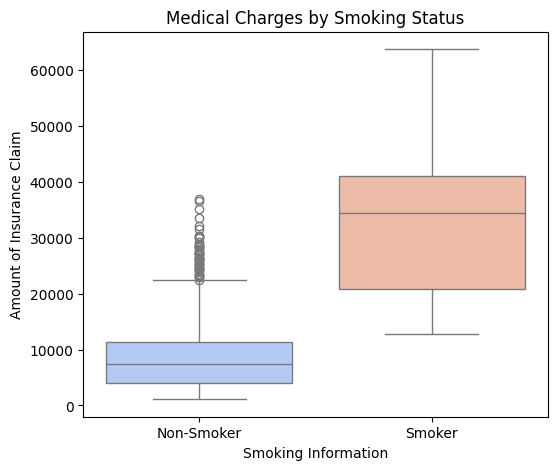

In [71]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df["smoker"], y=df["charges"], palette="coolwarm",legend=False)
plt.xticks([0, 1], ["Non-Smoker", "Smoker"])
plt.xlabel("Smoking Information")
plt.ylabel("Amount of Insurance Claim")
plt.title("Medical Charges by Smoking Status")
plt.show()


* Smokers pay much higher medical charges than non-smokers

* Mann-Whitney U Test p-value confirms the difference is statistically significant

* Smoker vs. Non-Smoker charges should be considered a critical factor in insurance pricing


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
Predicting Medical Charges Using Regression
</div>

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Encode categorical variables
df_encoded = df.copy()

# Define features and target variable
X = df_encoded.drop(columns=["charges"])  # Features
y = df_encoded["charges"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
# Train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate models
print("\nRandom Forest Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_rf):.2f}")

print("\nLinear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lr):.2f}")



Random Forest Regression:
R² Score: 0.8817
RMSE: 4663.11

Linear Regression:
R² Score: 0.8093
RMSE: 5919.57


* Random Forest performs significantly better than Linear Regression (higher R², lower RMSE).


<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
Risk Assessment for Pricing Insurance Premiums
</div>

*  Insight: Smoking, BMI, and age are major predictors of higher medical expenses.
*  Application: Insurance companies can adjust premium costs based on high-risk factors:
    * Smokers pay significantly higher medical bills -> Increase premiums for smokers.
    * Higher BMI correlates with higher charges ->  Offer incentives for healthier lifestyles.
    * Old age customers have higher costs ->  Modify pricing strategies for different age groups.
* Business Impact: More accurate risk-based pricing ensures fair premium calculation and reduces financial risks for the company.



C:\Users\beena\AppData\Local\Temp\ipykernel_37772\3789177866.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="magma")


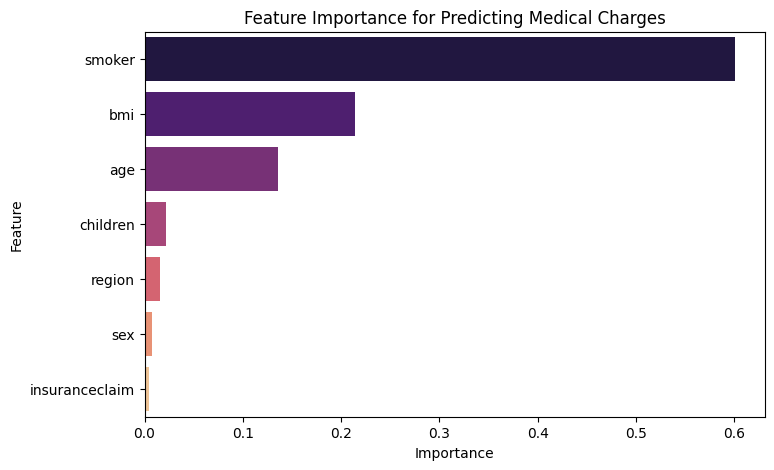

In [74]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="magma")
plt.title("Feature Importance for Predicting Medical Charges")
plt.show()


* Smoking has the highest impact – Insurance companies can adjust premiums accordingly.

* BMI and Age contribute significantly – Higher BMI and older age likely lead to higher medical costs.

* Region and sex have a smaller effect – Insurers may not need to rely heavily on these factors when pricing policies.

<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
Customer Segmentation for Tailored Insurance Plans
</div> 

* Insight: Different factors impact medical costs differently.
* Application: This project helps insurance companies,to segment customers into risk categories:
    * Low Risk: Non-smokers with a healthy BMI (Lower premiums).
    * Medium Risk: Slightly overweight, occasional smokers (Standard premiums).
    * High Risk: Smokers with high BMI and existing claims (Higher premiums).
* Business Impact: Allows targeted marketing and personalized insurance plans, improving customer satisfaction and retention.

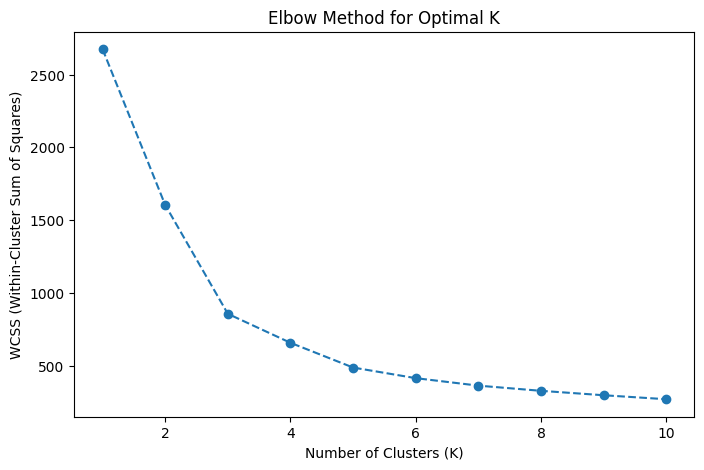

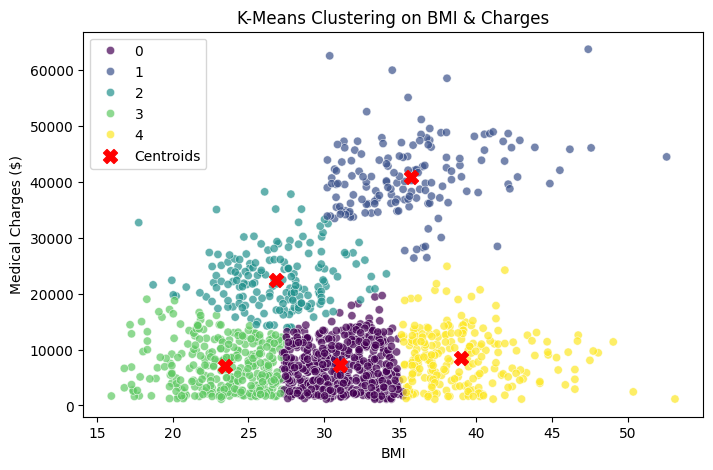

         Total People in Cluster  Smokers in Cluster  Smoker Percentage
Cluster                                                                
0                            470                   0           0.000000
1                            154                 142          92.207792
2                            175                 114          65.142857
3                            306                  18           5.882353
4                            232                   0           0.000000


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant features for clustering
X = df[["bmi", "charges"]]

# Scale the data for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):  # Checking K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
# Choose K based on the Elbow Method 
optimal_k = 5
# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Scatter plot to visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["Cluster"], palette="viridis", alpha=0.7)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=100, c="red", marker="X", label="Centroids")

plt.xlabel("BMI")
plt.ylabel("Medical Charges ($)")
plt.title("K-Means Clustering on BMI & Charges")
plt.legend()
plt.show()

# Count the number of smokers in each cluster
smoker_counts = df.groupby("Cluster")["smoker"].sum()  # Sum gives count of smokers (since smoker=1)
total_counts = df["Cluster"].value_counts()  # Total number of people in each cluster

# Create a DataFrame to display smoker percentage per cluster
cluster_smoker_df = pd.DataFrame({
    "Total People in Cluster": total_counts,
    "Smokers in Cluster": smoker_counts,
    "Smoker Percentage": (smoker_counts / total_counts) * 100
}).sort_index()

# Display the results
print(cluster_smoker_df)


* Cluster 1 (92.2% Smokers)
    * High-risk group with very high medical charges.
    * Insurance premiums should be increased for this segment.
    * Preventive health programs needed (smoking cessation, wellness plans).

* Cluster 2 (65.1% Smokers)
    * Moderate-risk group with some potential for high medical costs.
    * May include ex-smokers or occasional smokers.
    * Premiums should be slightly adjusted based on medical history.

* Clusters 0, 3, 4 (Non-Smokers, Low Risk)
    * These groups have little to no smokers-> lower medical costs.
    * Ideal candidates for lower insurance premiums.

<div style="background-color:#00274d; color:#ffffff; padding:10px; border-radius:5px; font-size:22px; font-weight:bold;">
 Fraud Detection & Claims Verification
</div>

* Insight: The model can predict expected medical costs based on policyholder data.
* Application: If a customer claims an unusually high amount, the company can:
    * Compare the predicted cost vs. claimed cost.
    * Identify potential fraudulent claims and request additional verification.
    * Improve claims processing efficiency by flagging suspicious claims.
* Business Impact: Helps reduce fraudulent claims, saving millions in unnecessary payouts.

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Select only the required features
selected_features = ["age", "bmi", "smoker"]

# Define the dataset with only the necessary columns
X = df[selected_features]
y = df["charges"]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor with the selected features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the updated model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model retrained and saved with only necessary features!")


Model retrained and saved with only necessary features!


In [79]:
# tkinter app for medical charge prediction
import pandas as pd
import tkinter as tk
from tkinter import messagebox
# Load trained models
with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# Define correct feature names
feature_names = ["age", "bmi", "smoker"]

def predict_insurance():
    try:
        # Get user input
        age = float(age_entry.get())
        bmi = float(bmi_entry.get())
        smoker = smoker_var.get()  # 1 if smoker, 0 if non-smoker

        # Prepare input as a DataFrame with the correct feature names
        input_data = pd.DataFrame([[age, bmi, smoker]], columns=feature_names)

        # Predict medical charges
        predicted_charge = rf_model.predict(input_data)[0]

        # Display result
        result_text.set(f"Predicted Medical Charges: ${predicted_charge:,.2f}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

# Create Tkinter window
root = tk.Tk()
root.title("Insurance Cost & Claim Predictor")

# Labels and input fields
tk.Label(root, text="Enter Age:").grid(row=0, column=0, padx=10, pady=5)
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Enter BMI:").grid(row=1, column=0, padx=10, pady=5)
bmi_entry = tk.Entry(root)
bmi_entry.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Smoker:").grid(row=2, column=0, padx=10, pady=5)
smoker_var = tk.IntVar()
tk.Radiobutton(root, text="No", variable=smoker_var, value=0).grid(row=2, column=1)
tk.Radiobutton(root, text="Yes", variable=smoker_var, value=1).grid(row=2, column=2)

# Predict Button
predict_button = tk.Button(root, text="Predict", command=predict_insurance)
predict_button.grid(row=3, column=0, columnspan=2, pady=10)

# Output Label
result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text, fg="blue", font=("Arial", 12, "bold"))
result_label.grid(row=4, column=0, columnspan=3, pady=10)

# Run Tkinter App
root.mainloop()